In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

df = pd.read_csv("data/teleconnect_churn_synth.csv")
print(df.shape)
df.head()

(15500, 34)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechComplaint,NumSupportCalls,CustomerSatisfaction,HasMultipleServices,AvgMonthlyRevenue,PaymentRegularityIndex,SupportInteractionRate,LoyaltyScore,PromoResponse,NetPromoterScore
0,7590-VHVEG,No,Female,0.0,Yes,No,1.0,No,No phone service,DSL,...,0,2,4,0,29.850000,0.966667,1.000000,43.89,1,8
1,5575-GNVDE,No,Male,0.0,No,No,34.0,Yes,No,DSL,...,1,1,1,0,55.573529,0.283333,0.029412,30.56,0,0
2,3668-QPYBK,Yes,Male,0.0,No,No,2.0,Yes,No,DSL,...,0,1,5,0,54.075000,0.566667,0.500000,42.44,1,9
3,7795-CFOCW,No,Male,0.0,No,No,45.0,No,No phone service,DSL,...,0,2,1,0,40.905556,0.433333,0.044444,39.67,0,0
4,9237-HQITU,Yes,Female,0.0,No,No,2.0,Yes,No,Fiber optic,...,0,1,2,0,75.825000,0.700000,0.500000,27.11,0,2


In [3]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customerID                    15500 non-null  object 
 1   Churn                         15500 non-null  object 
 2   gender                        15500 non-null  object 
 3   SeniorCitizen                 15500 non-null  float64
 4   Partner                       15500 non-null  object 
 5   Dependents                    15500 non-null  object 
 6   tenure                        15500 non-null  float64
 7   PhoneService                  15500 non-null  object 
 8   MultipleLines                 15500 non-null  object 
 9   InternetService               15500 non-null  object 
 10  OnlineSecurity                15500 non-null  object 
 11  OnlineBackup                  15500 non-null  object 
 12  DeviceProtection              15500 non-null  object 
 13  T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,15500,15500,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,15500,2,No,13631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,15500,2,Male,7832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,15500.0,NaN,NaN,NaN,0.166492,0.367307,0.0,0.0,0.0,0.015805,1.0
Partner,15500,2,No,8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,15500,2,No,10883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,15500.0,NaN,NaN,NaN,32.647932,24.501873,1.0,9.0,29.060859,56.0,72.0
PhoneService,15500,2,Yes,13998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,15500,3,No,7466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,15500,3,Fiber optic,6782,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum().sort_values(ascending=False).head(10)
df.duplicated().sum()

np.int64(0)

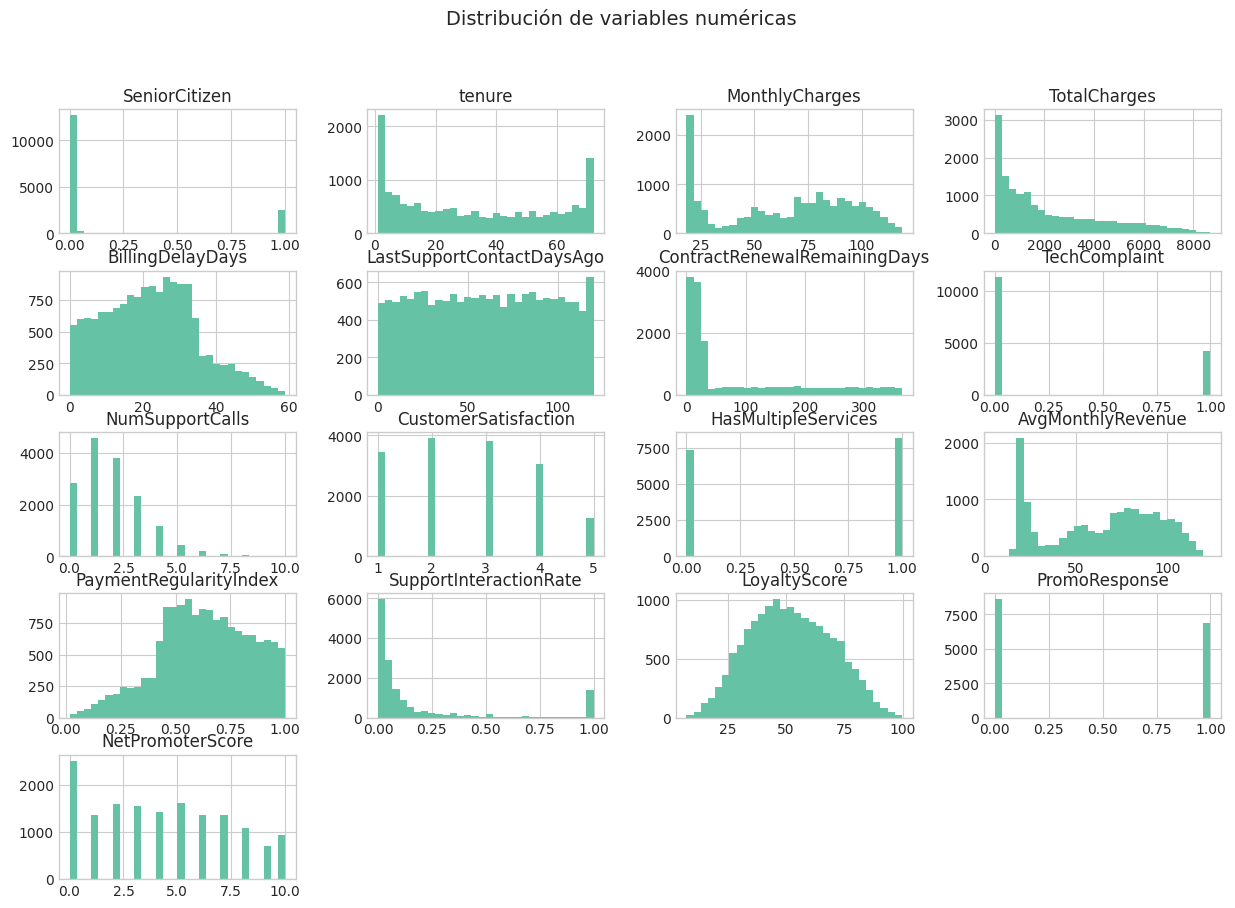

In [5]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribución de variables numéricas", fontsize=14)
plt.show()

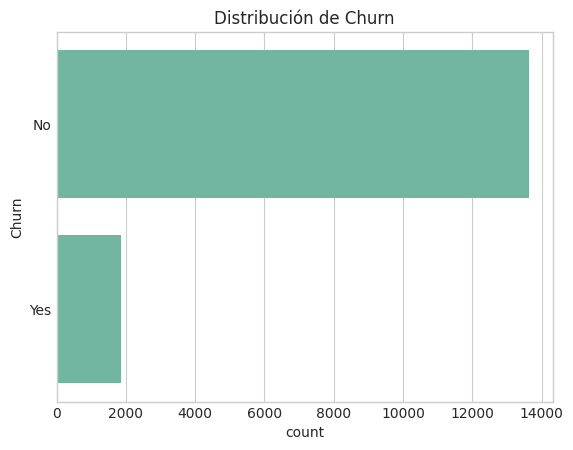

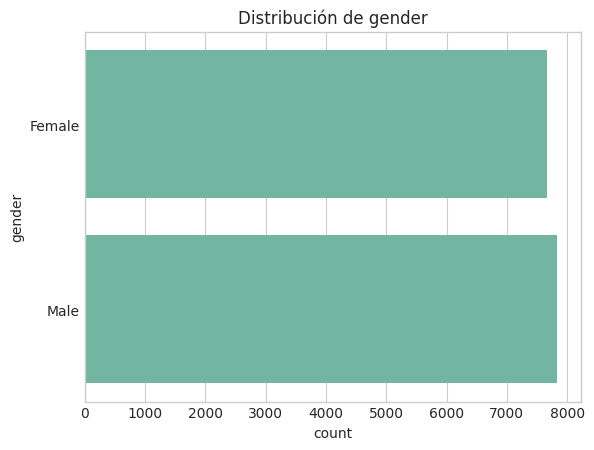

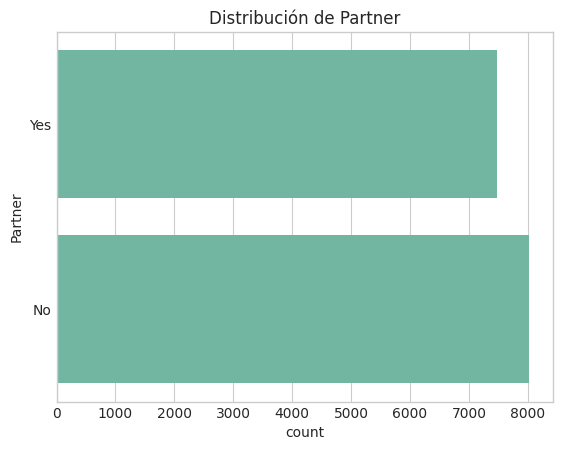

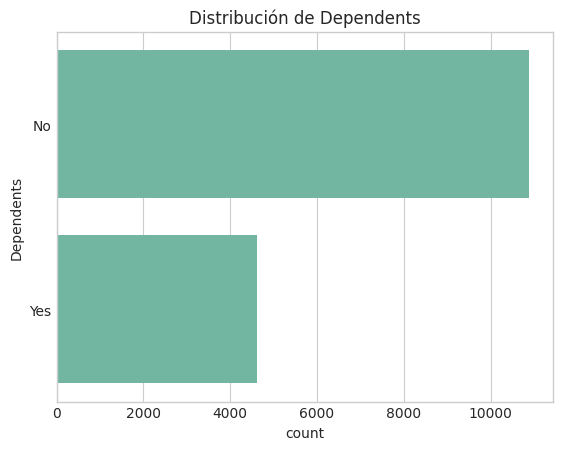

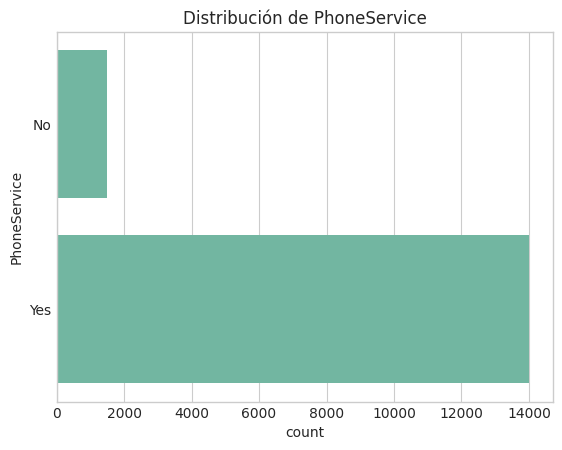

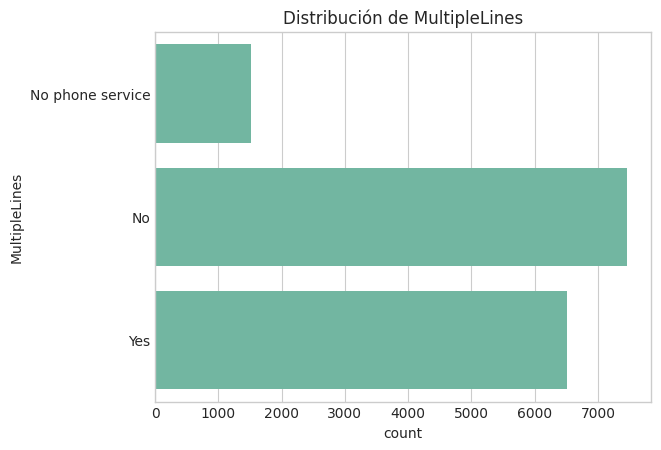

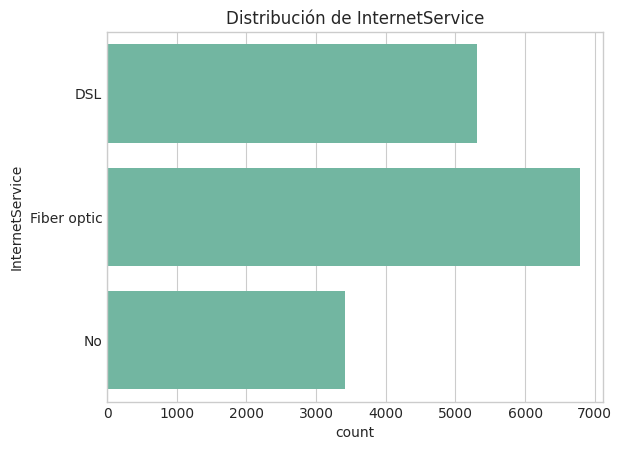

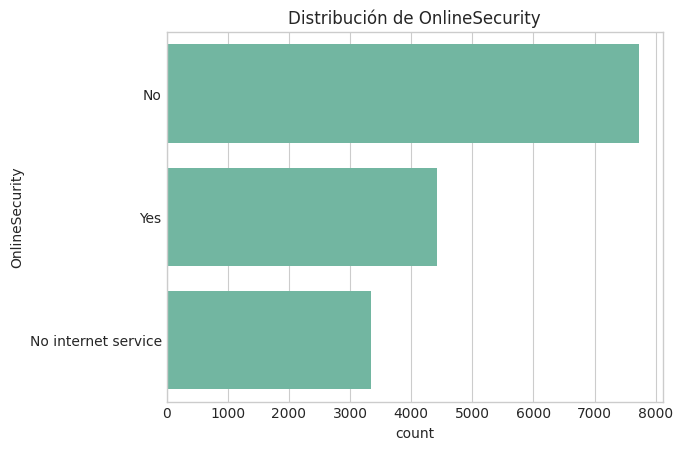

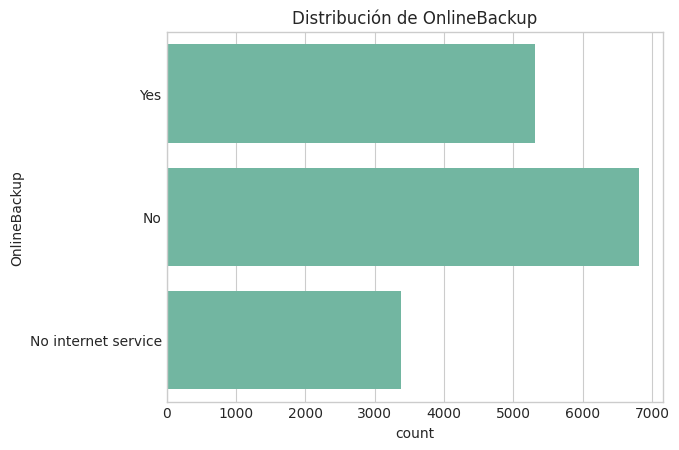

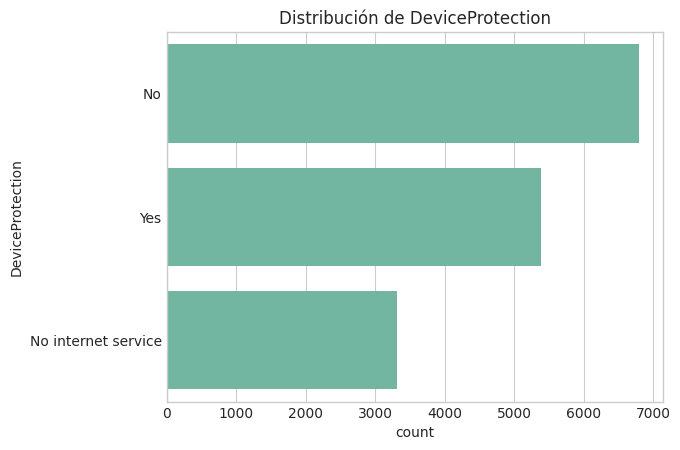

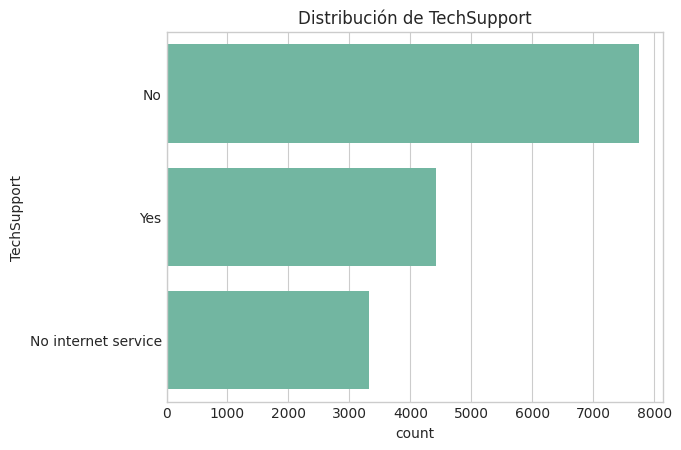

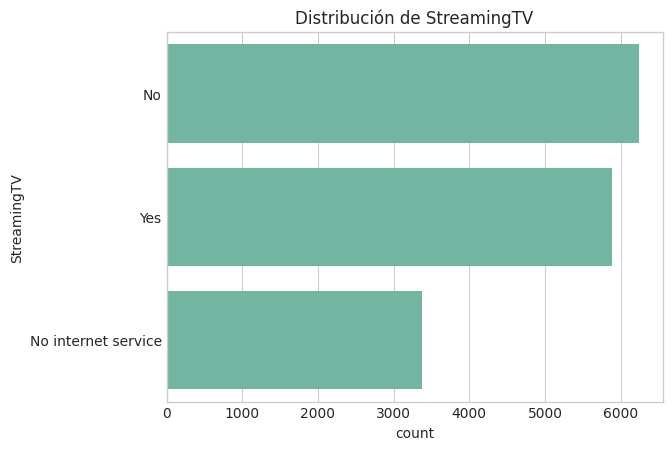

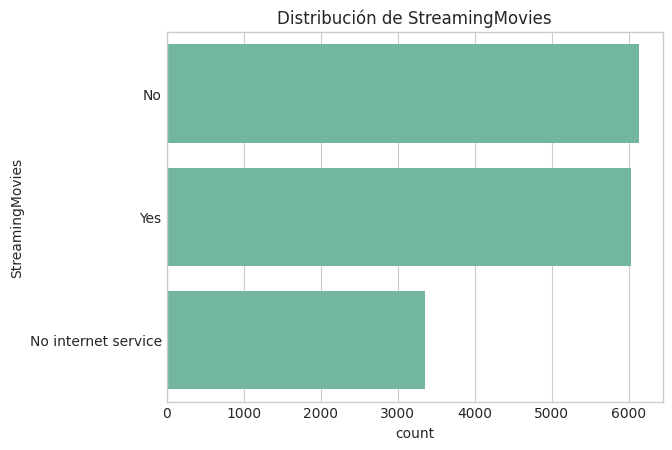

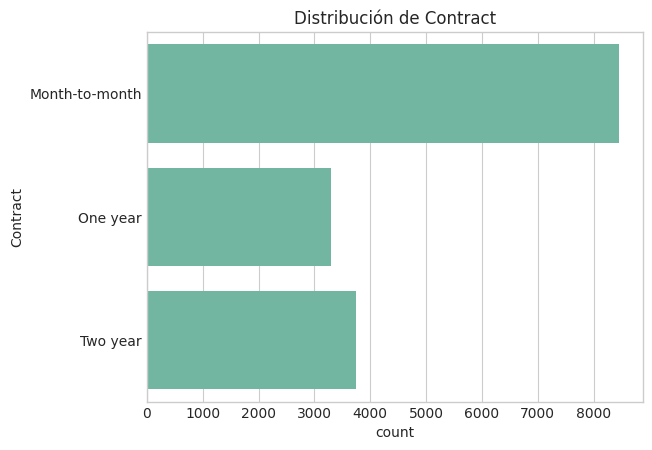

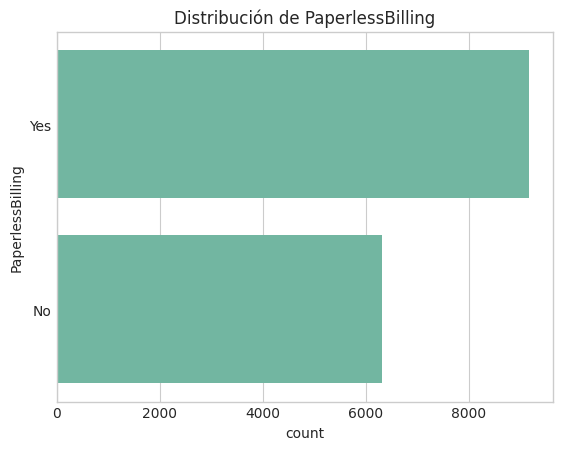

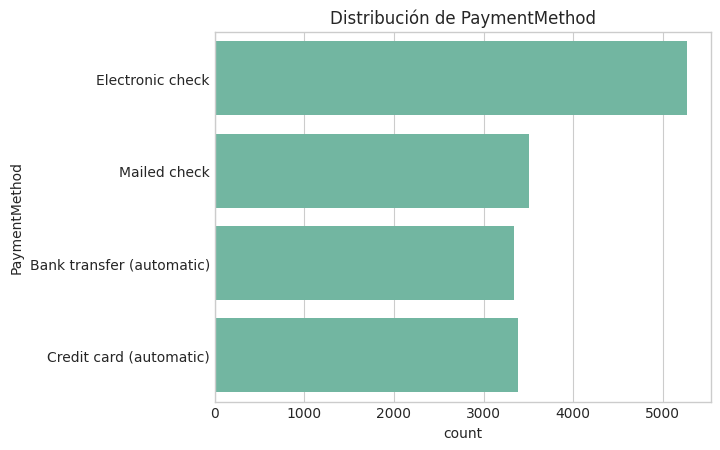

In [6]:
cat_cols = df.select_dtypes(exclude=np.number).columns.drop(["customerID"])
for c in cat_cols:
    sns.countplot(y=c, data=df)
    plt.title(f"Distribución de {c}")
    plt.show()


Text(0.5, 1.0, 'Distribución de la variable objetivo (Churn)')

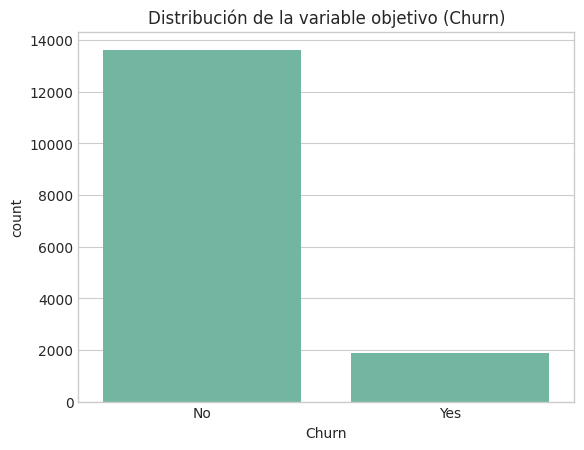

In [7]:
df['Churn'].value_counts(normalize=True)
sns.countplot(x='Churn', data=df)
plt.title("Distribución de la variable objetivo (Churn)")

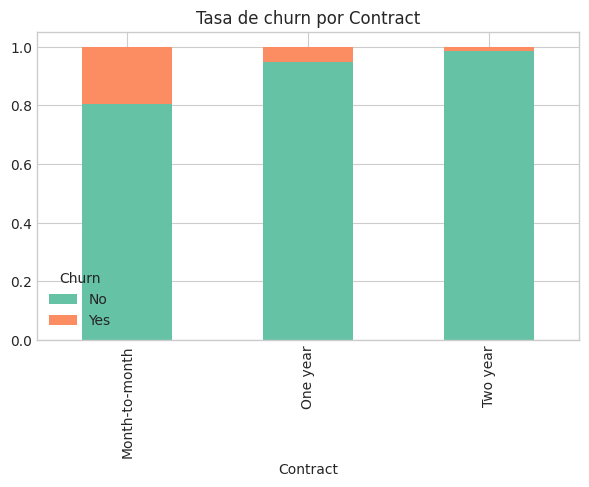

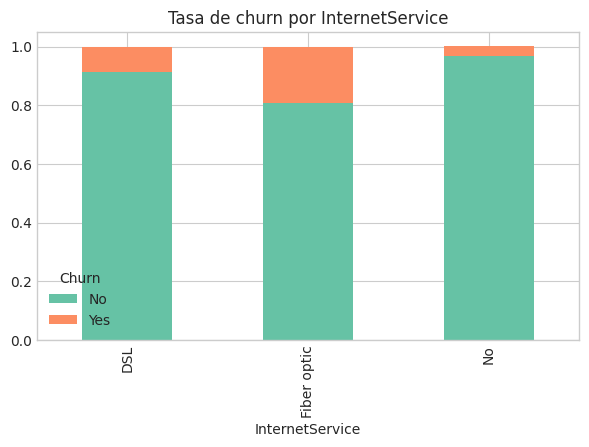

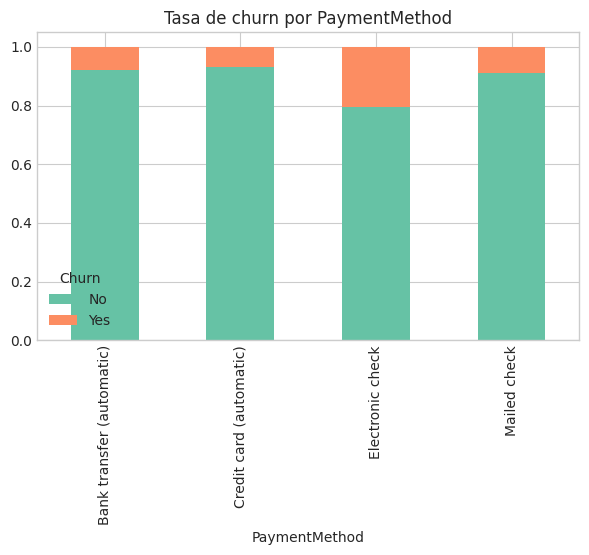

In [8]:
for col in ['Contract', 'InternetService', 'PaymentMethod']:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate.plot(kind='bar', stacked=True, figsize=(7,4))
    plt.title(f"Tasa de churn por {col}")
    plt.show()

In [ ]:
df['ChurnBinary'] = df['Churn'].map({'Yes': 1, 'No': 0})
target_corr = df.corr(numeric_only=True)['ChurnBinary'].dropna().sort_values(ascending=False)
target_corr.head(10)

Text(0.5, 1.0, 'Matriz de correlaciones numéricas')

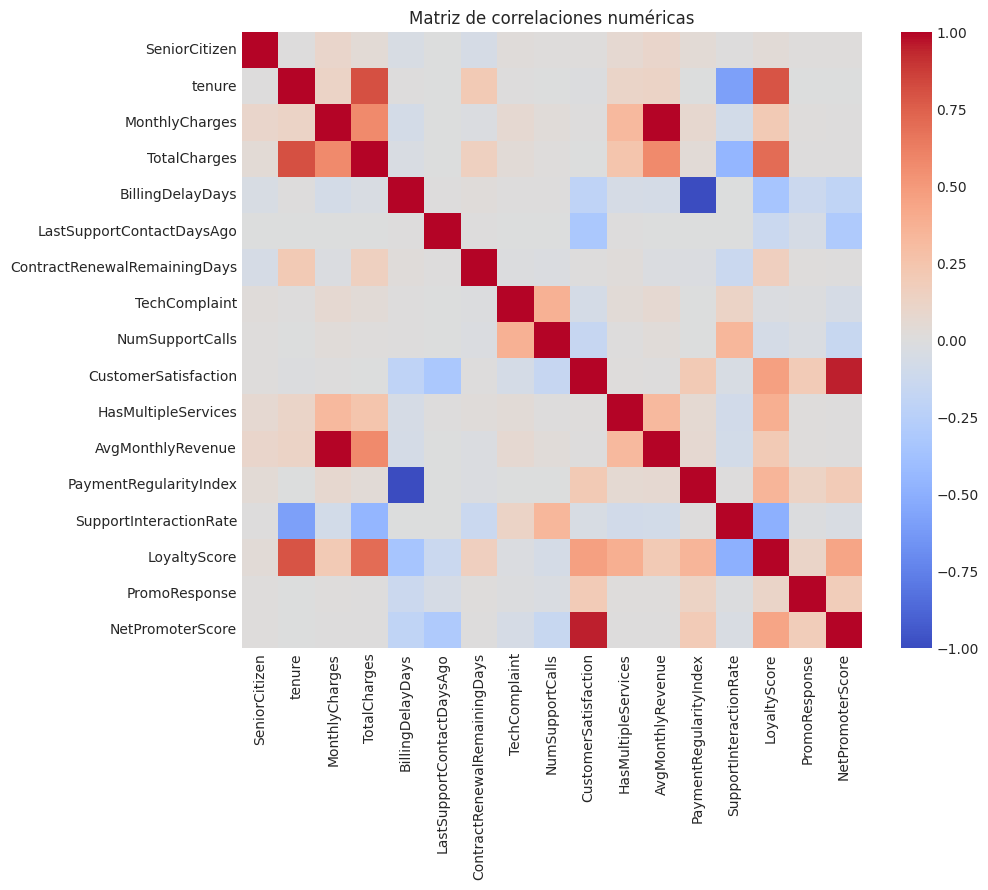

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Matriz de correlaciones numéricas")

Text(0.5, 1.0, 'Tenure vs Satisfacción del cliente según Churn')

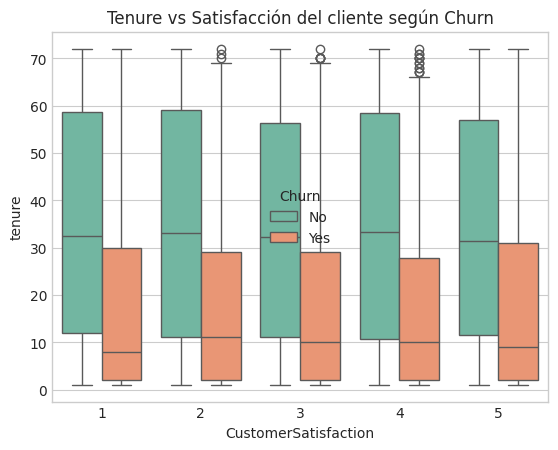

In [12]:
sns.boxplot(x='CustomerSatisfaction', y='tenure', hue='Churn', data=df)
plt.title("Tenure vs Satisfacción del cliente según Churn")

Text(0.5, 1.0, 'Relación entre retrasos de pago y abandono')

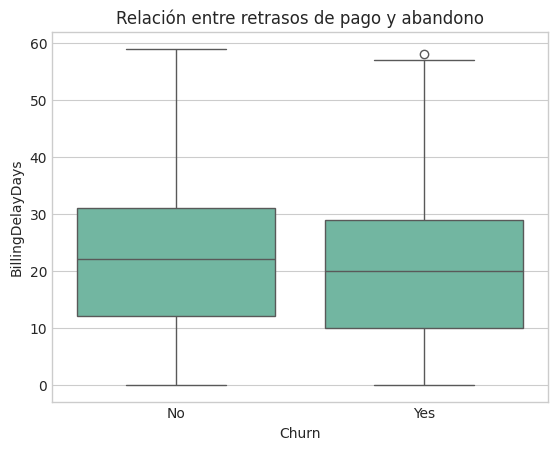

In [13]:
sns.boxplot(x='Churn', y='BillingDelayDays', data=df)
plt.title("Relación entre retrasos de pago y abandono")

Text(0.5, 1.0, 'LoyaltyScore vs Revenue promedio')

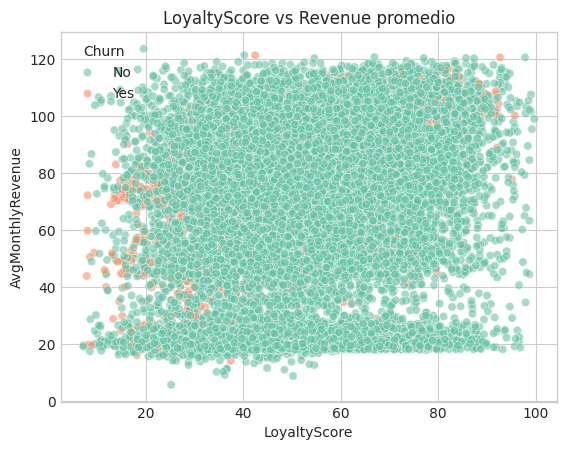

In [14]:
sns.scatterplot(x='LoyaltyScore', y='AvgMonthlyRevenue', hue='Churn', data=df, alpha=0.6)
plt.title("LoyaltyScore vs Revenue promedio")


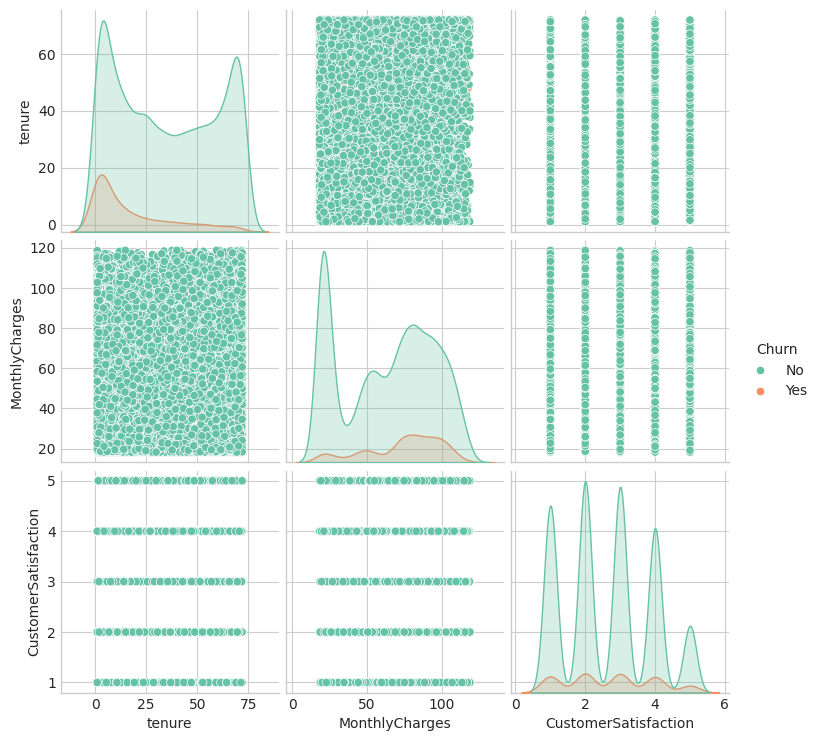

In [15]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'CustomerSatisfaction', 'Churn']], hue='Churn', diag_kind='kde')
